Tần số lấy mẫu: 16000 Hz
Kích thước mảng: (48896,)


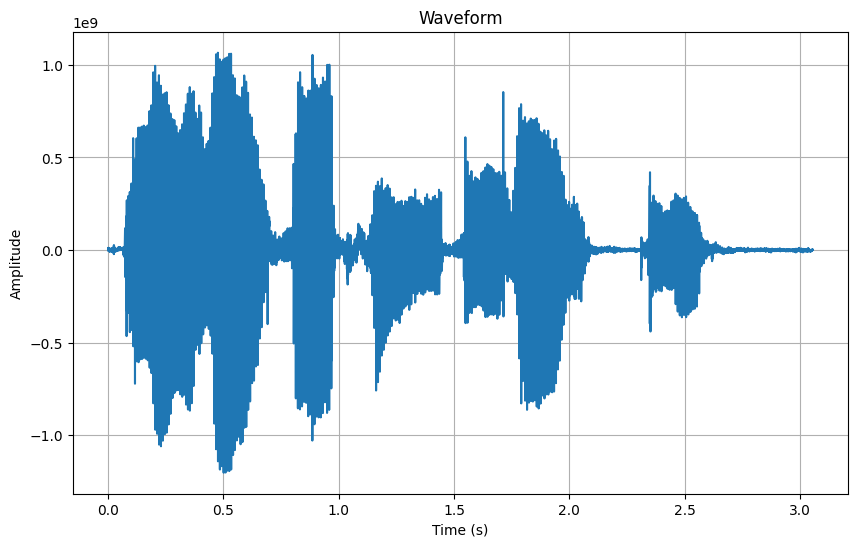

48896


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Đọc file âm thanh
fs, y = wavfile.read(r"temp_audio.wav")
num_samples = len(y)
x = np.arange(0, num_samples) / fs

print(f"Tần số lấy mẫu: {fs} Hz")
print(f"Kích thước mảng: {y.shape}")


plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


SAMPLES = len(x)
print(SAMPLES)

In [3]:
fft_result = np.fft.fft(y)  # Tính FFT
magnitudes = np.abs(fft_result)[:SAMPLES//2]  # Chỉ lấy nửa đầu phổ (do đối xứng)
frequencies = np.fft.fftfreq(SAMPLES, d=1/fs)[:SAMPLES//2]  # Trục tần số


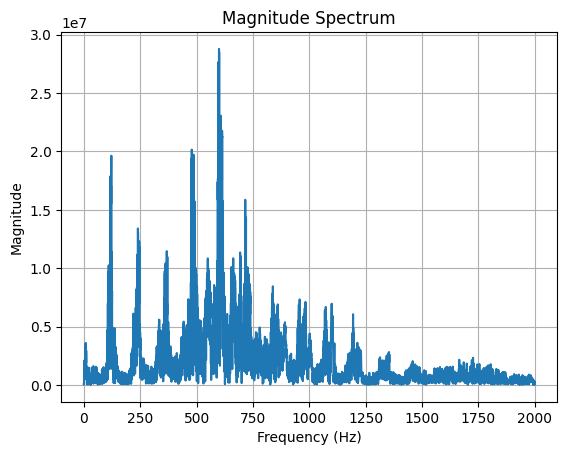

In [4]:
plt.plot(frequencies[:2000*SAMPLES//fs], 1/SAMPLES * 2 * magnitudes[:2000*SAMPLES//fs])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()

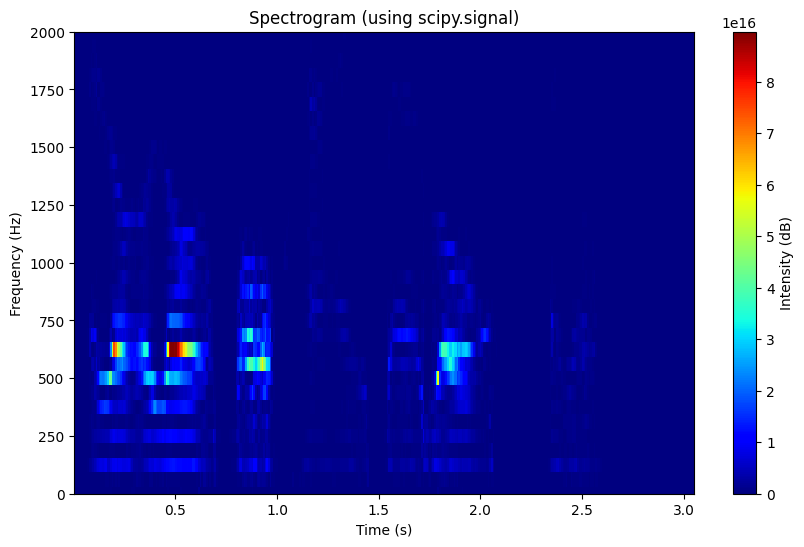

In [5]:
from scipy import signal

# Compute the spectrogram data using scipy.signal.spectrogram
f, t, Sxx = signal.spectrogram(y, fs=fs, nperseg=256, noverlap=128, scaling='spectrum')
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, Sxx, cmap='jet')
plt.title('Spectrogram (using scipy.signal)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 2000)  # Set y-axis limit from 0 to 100 Hz
plt.colorbar(label='Intensity (dB)')
plt.show()